In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import sys

data_path = Path('data')
csv_files = list(data_path.glob('*.csv'))
datasets = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    datasets[csv_file.stem] = df  
datasets = dict(sorted(datasets.items()))

output_path = Path('output')
output_path.mkdir(exist_ok=True)

In [2]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.rcParams['figure.figsize'] = (12, 6)

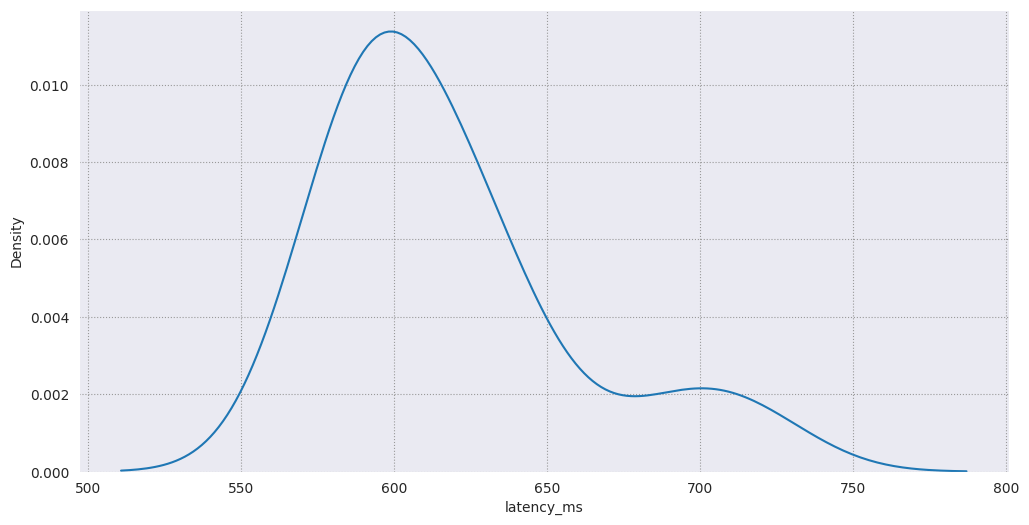

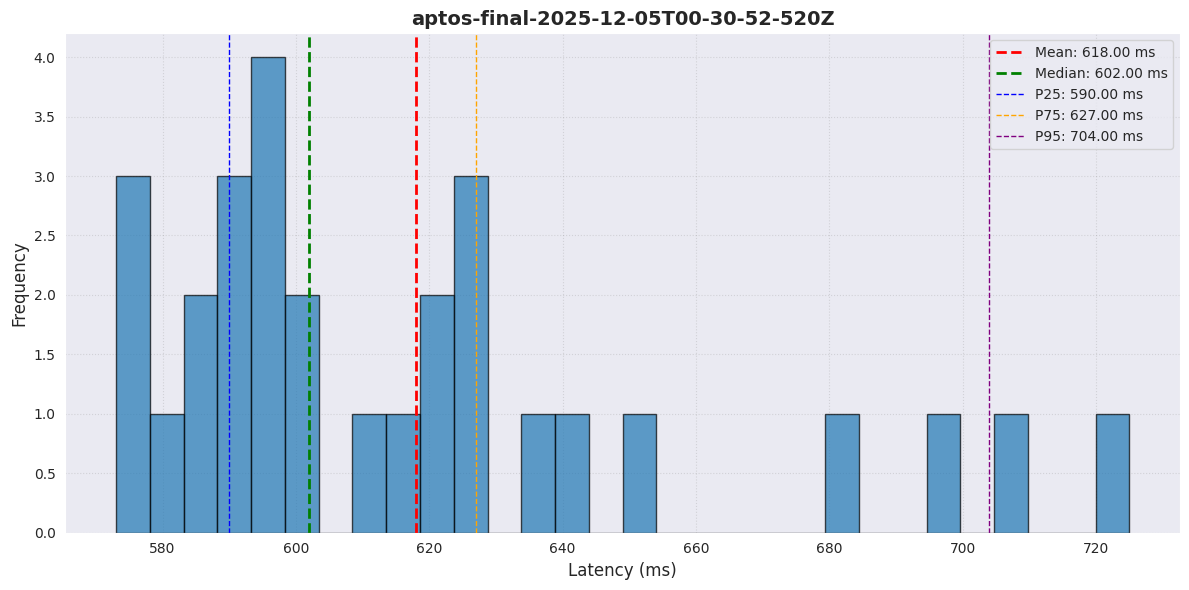

Graph saved: output/histogram_aptos-final-2025-12-05T00-30-52-520Z.png
statistics for aptos-final-2025-12-05T00-30-52-520Z:
  count: 29
  mean: 618.0
  median: 602.0
  std_dev: 40.591167230603965
  min: 573
  max: 725
  p25: 590.0
  p75: 627.0
  p95: 704.0
  p99: 720.24


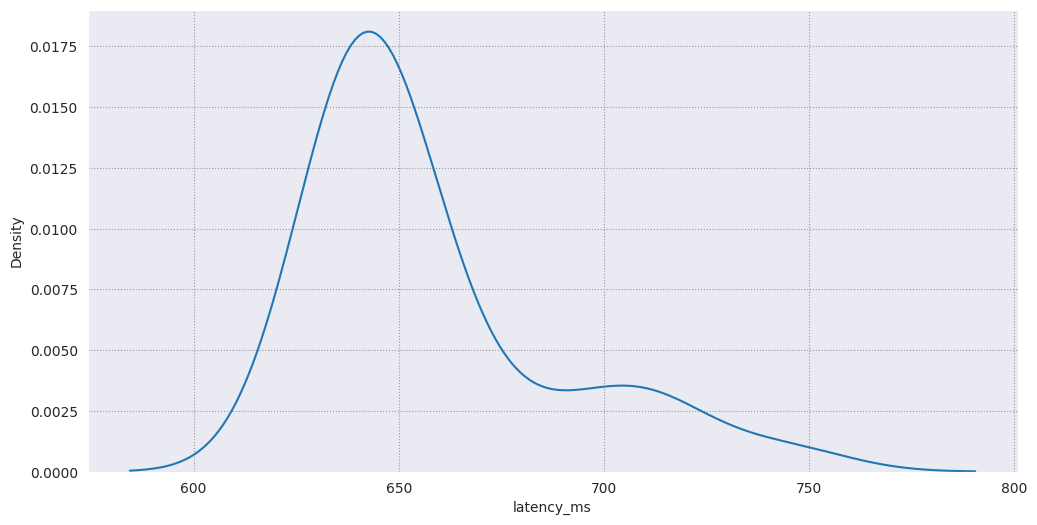

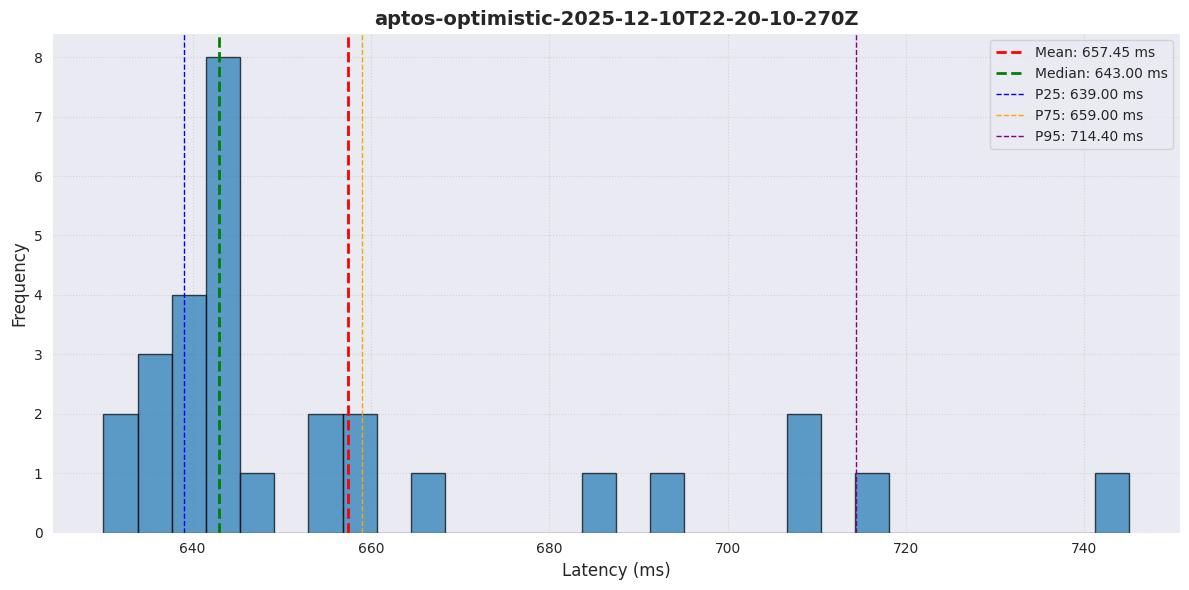

Graph saved: output/histogram_aptos-optimistic-2025-12-10T22-20-10-270Z.png
statistics for aptos-optimistic-2025-12-10T22-20-10-270Z:
  count: 29
  mean: 657.448275862069
  median: 643.0
  std_dev: 29.79164097395748
  min: 630
  max: 745
  p25: 639.0
  p75: 659.0
  p95: 714.4
  p99: 737.4399999999999


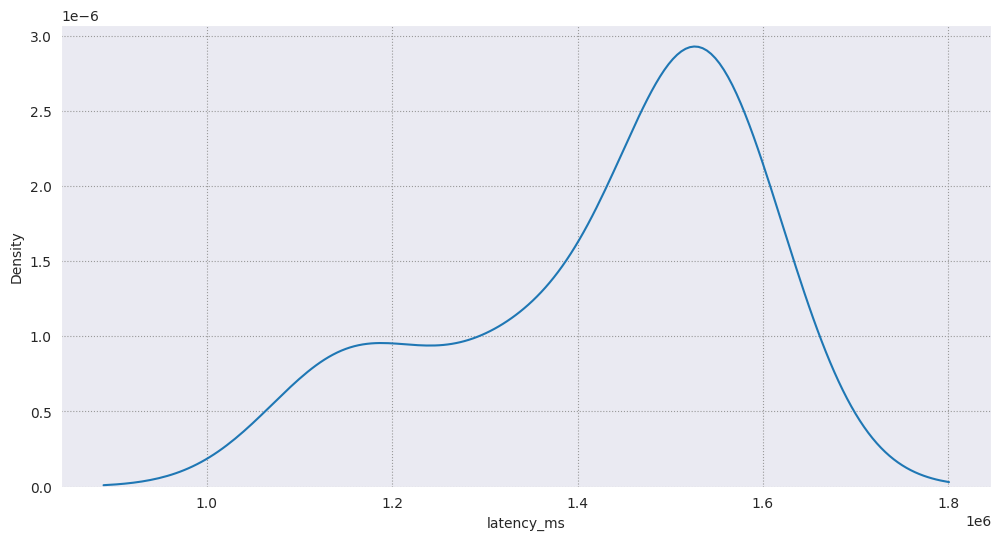

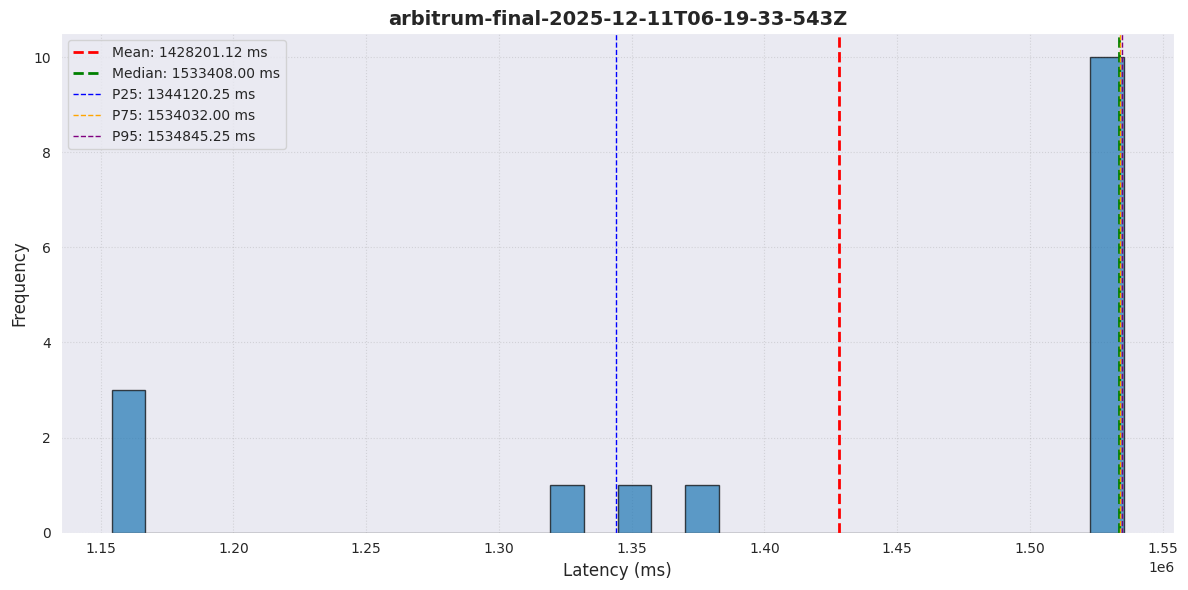

Graph saved: output/histogram_arbitrum-final-2025-12-11T06-19-33-543Z.png
statistics for arbitrum-final-2025-12-11T06-19-33-543Z:
  count: 16
  mean: 1428201.125
  median: 1533408.0
  std_dev: 154102.5711703626
  min: 1154070
  max: 1535374
  p25: 1344120.25
  p75: 1534032.0
  p95: 1534845.25
  p99: 1535268.25


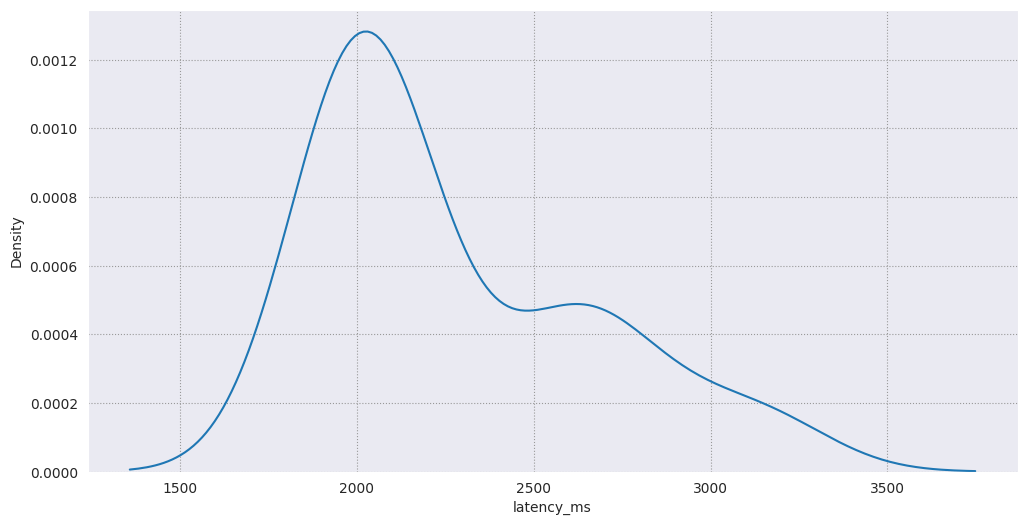

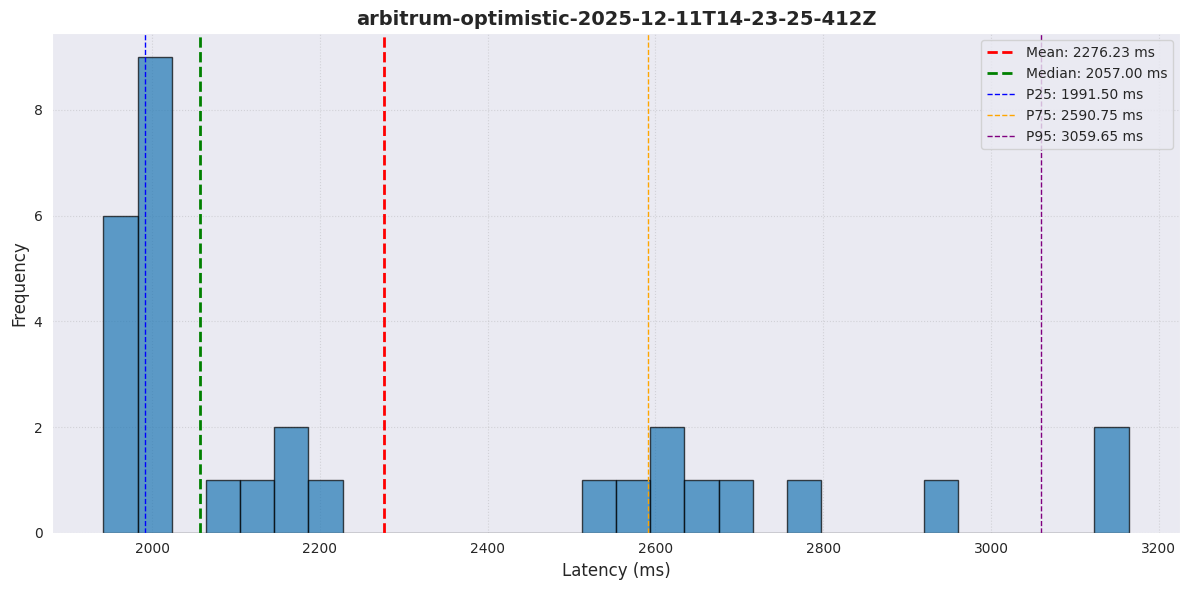

Graph saved: output/histogram_arbitrum-optimistic-2025-12-11T14-23-25-412Z.png
statistics for arbitrum-optimistic-2025-12-11T14-23-25-412Z:
  count: 30
  mean: 2276.233333333333
  median: 2057.0
  std_dev: 384.69886864953196
  min: 1942
  max: 3164
  p25: 1991.5
  p75: 2590.75
  p95: 3059.6499999999996
  p99: 3160.23


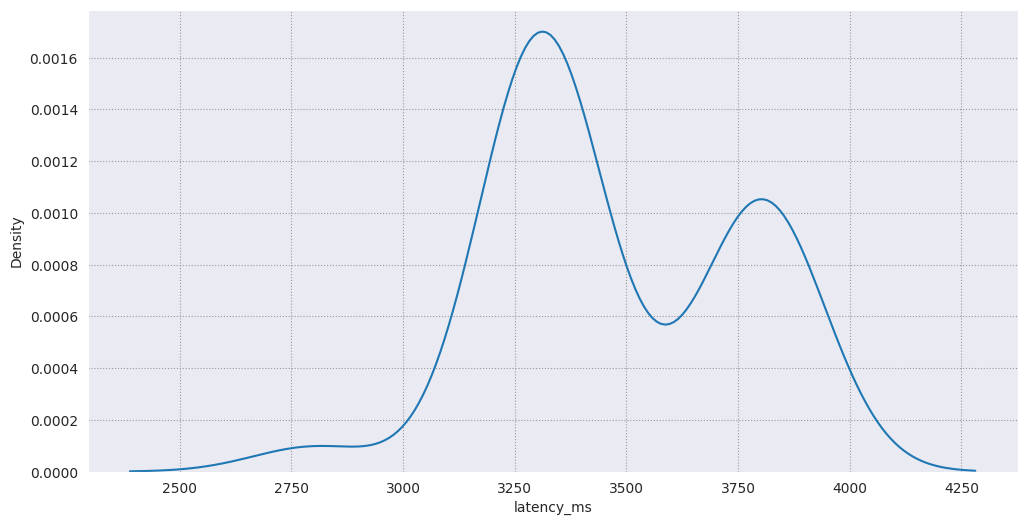

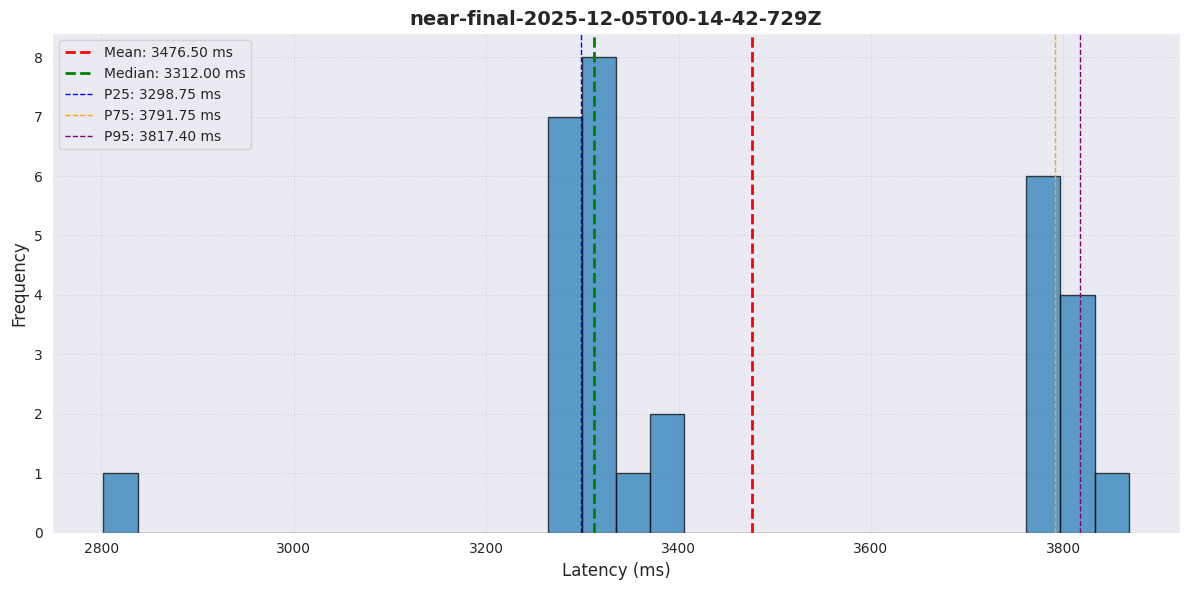

Graph saved: output/histogram_near-final-2025-12-05T00-14-42-729Z.png
statistics for near-final-2025-12-05T00-14-42-729Z:
  count: 30
  mean: 3476.5
  median: 3312.0
  std_dev: 271.89028593571874
  min: 2802
  max: 3868
  p25: 3298.75
  p75: 3791.75
  p95: 3817.4
  p99: 3854.37


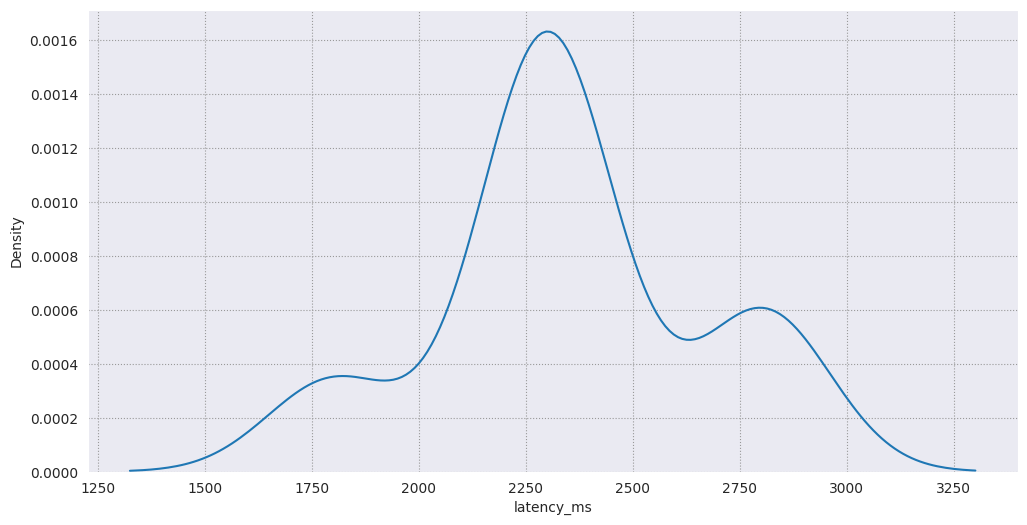

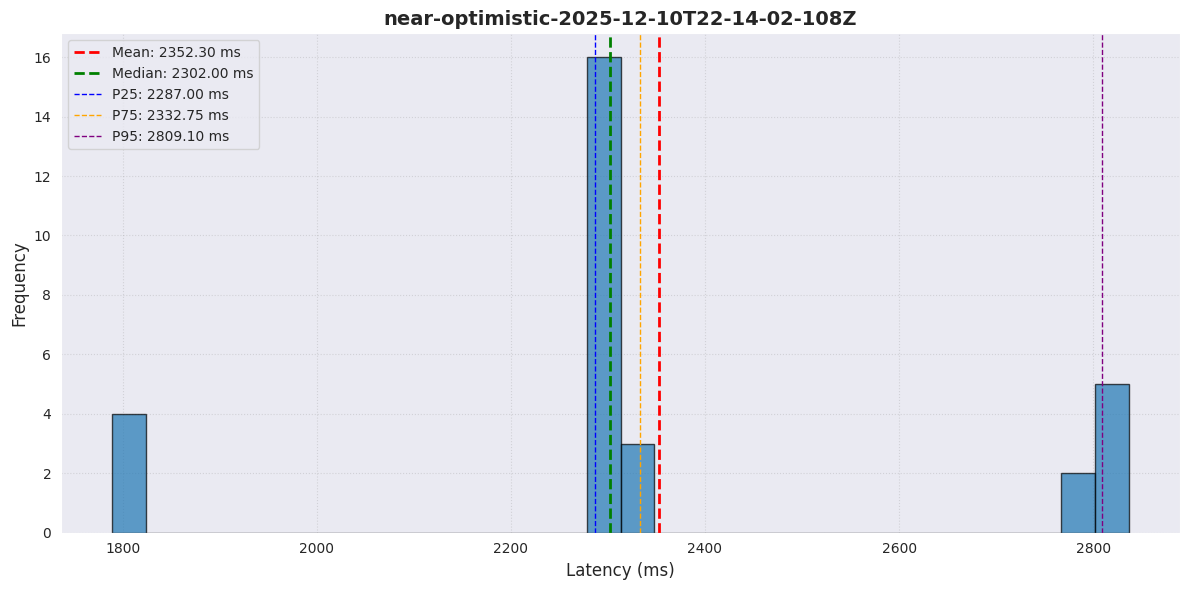

Graph saved: output/histogram_near-optimistic-2025-12-10T22-14-02-108Z.png
statistics for near-optimistic-2025-12-10T22-14-02-108Z:
  count: 30
  mean: 2352.3
  median: 2302.0
  std_dev: 305.23265857714006
  min: 1789
  max: 2837
  p25: 2287.0
  p75: 2332.75
  p95: 2809.1
  p99: 2829.17


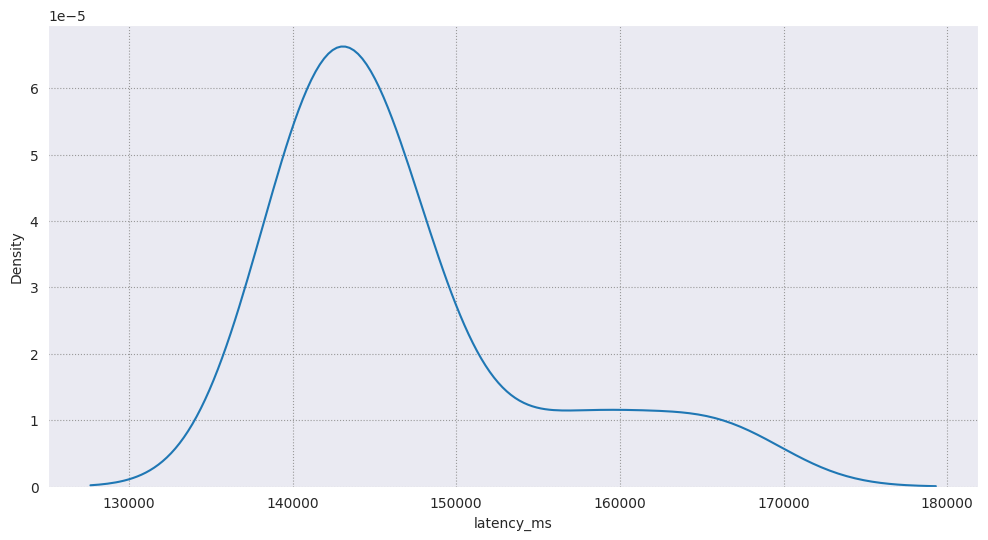

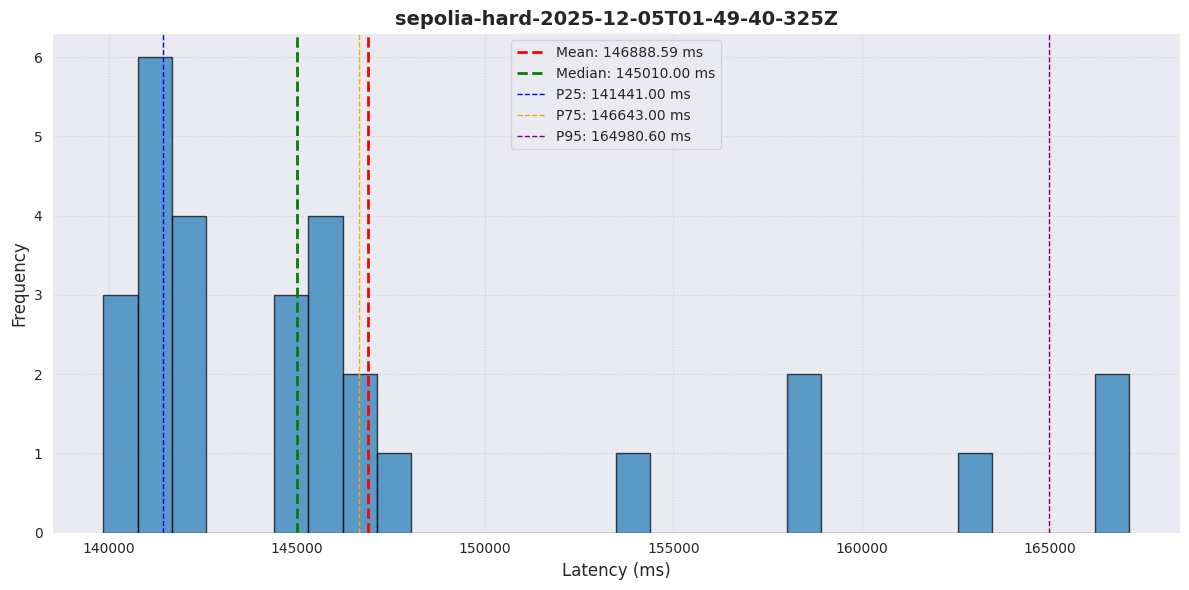

Graph saved: output/histogram_sepolia-hard-2025-12-05T01-49-40-325Z.png
statistics for sepolia-hard-2025-12-05T01-49-40-325Z:
  count: 29
  mean: 146888.58620689655
  median: 145010.0
  std_dev: 7981.661420841266
  min: 139858
  max: 167099
  p25: 141441.0
  p75: 146643.0
  p95: 164980.6
  p99: 166899.08


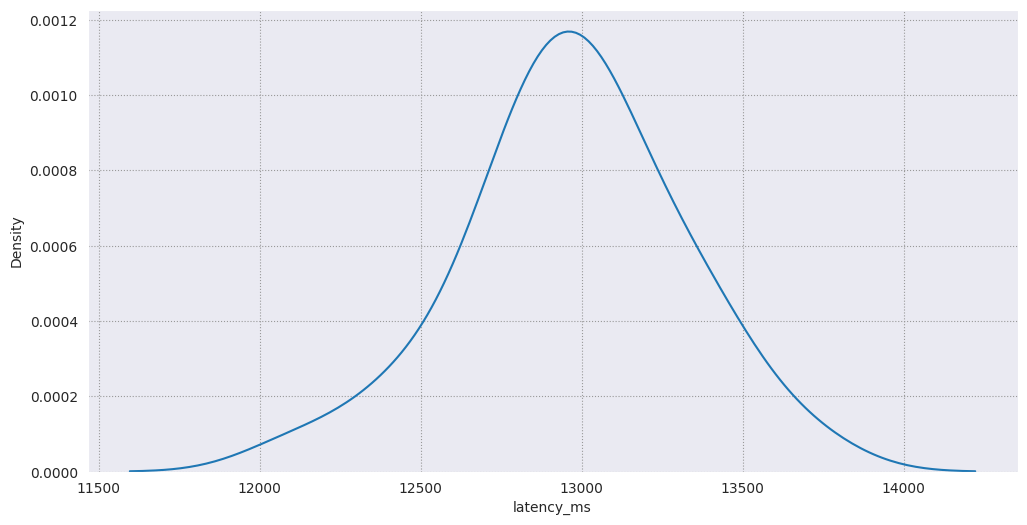

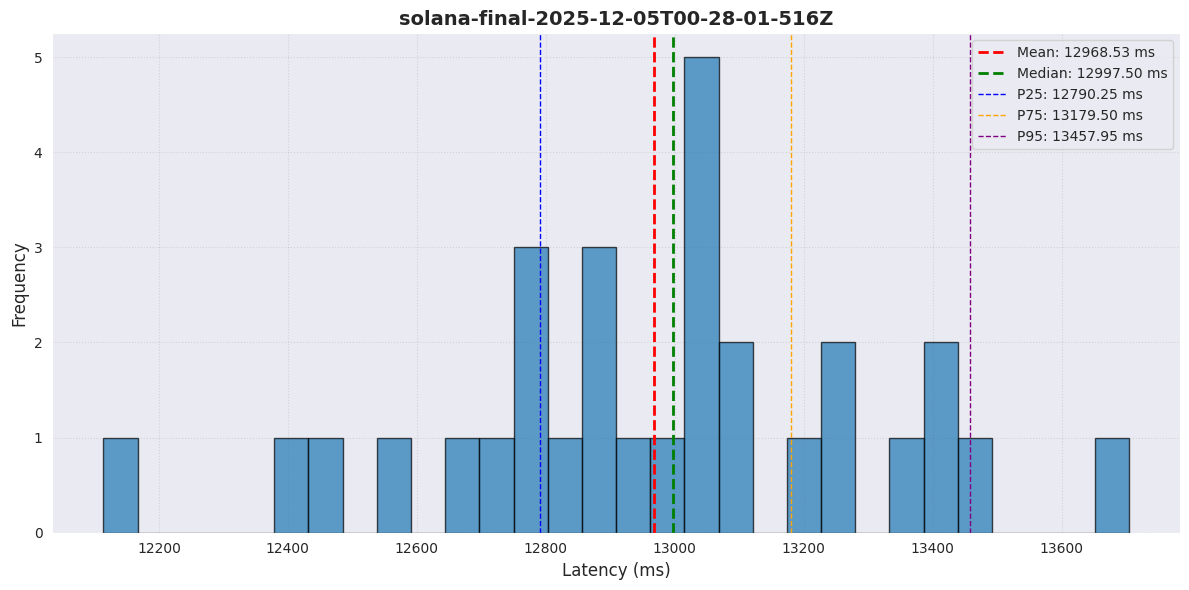

Graph saved: output/histogram_solana-final-2025-12-05T00-28-01-516Z.png
statistics for solana-final-2025-12-05T00-28-01-516Z:
  count: 30
  mean: 12968.533333333333
  median: 12997.5
  std_dev: 340.77991009805254
  min: 12114
  max: 13704
  p25: 12790.25
  p75: 13179.5
  p95: 13457.949999999999
  p99: 13641.65


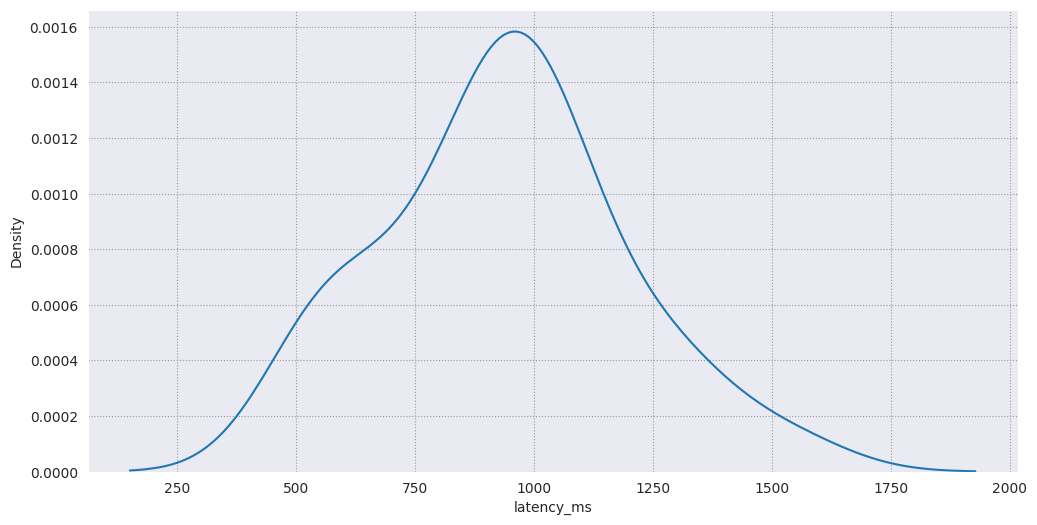

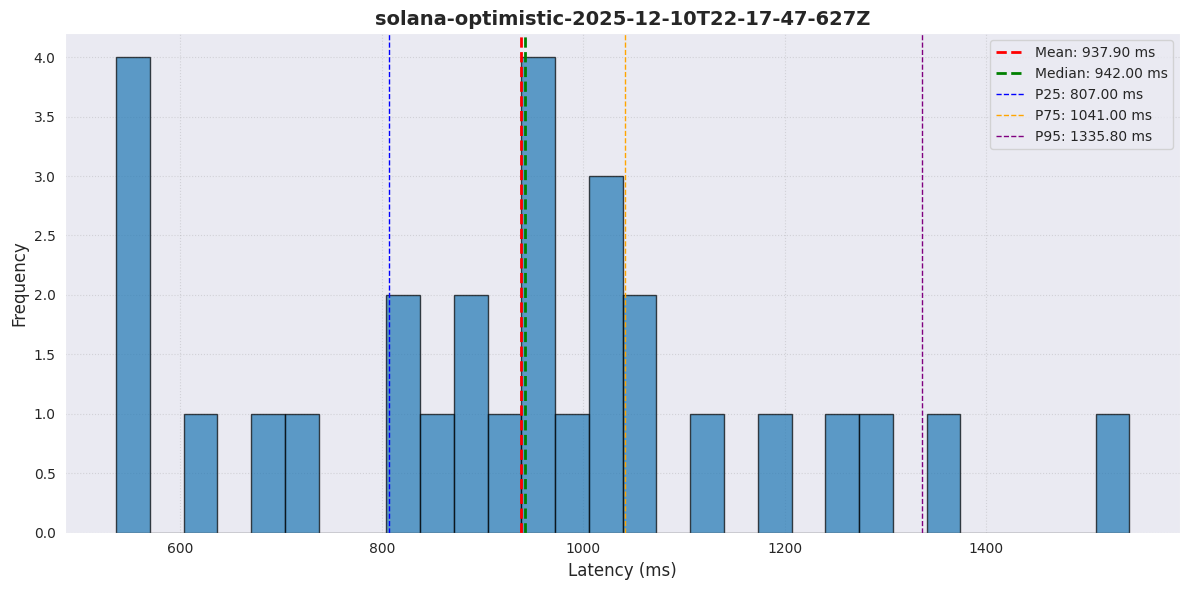

Graph saved: output/histogram_solana-optimistic-2025-12-10T22-17-47-627Z.png
statistics for solana-optimistic-2025-12-10T22-17-47-627Z:
  count: 29
  mean: 937.8965517241379
  median: 942.0
  std_dev: 251.84453039064545
  min: 536
  max: 1542
  p25: 807.0
  p75: 1041.0
  p95: 1335.8
  p99: 1490.7599999999998


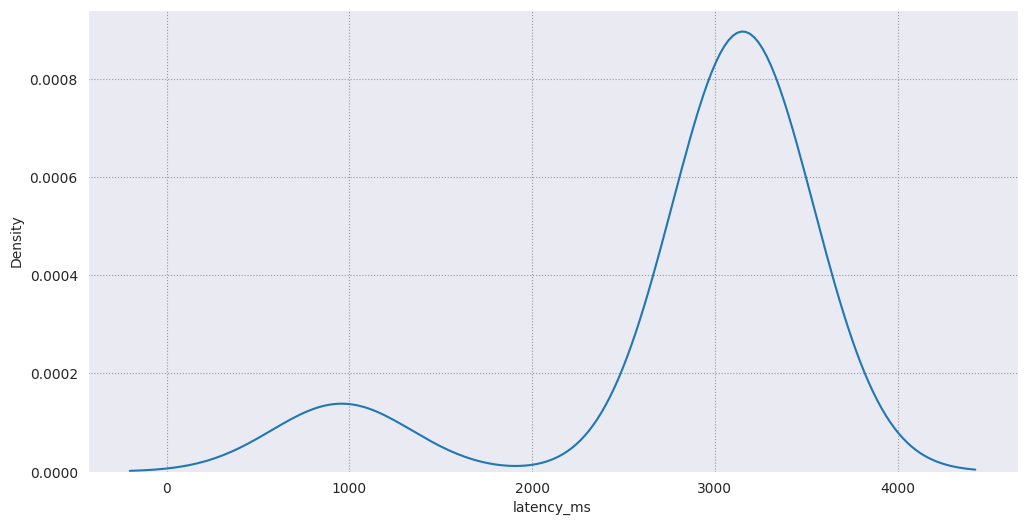

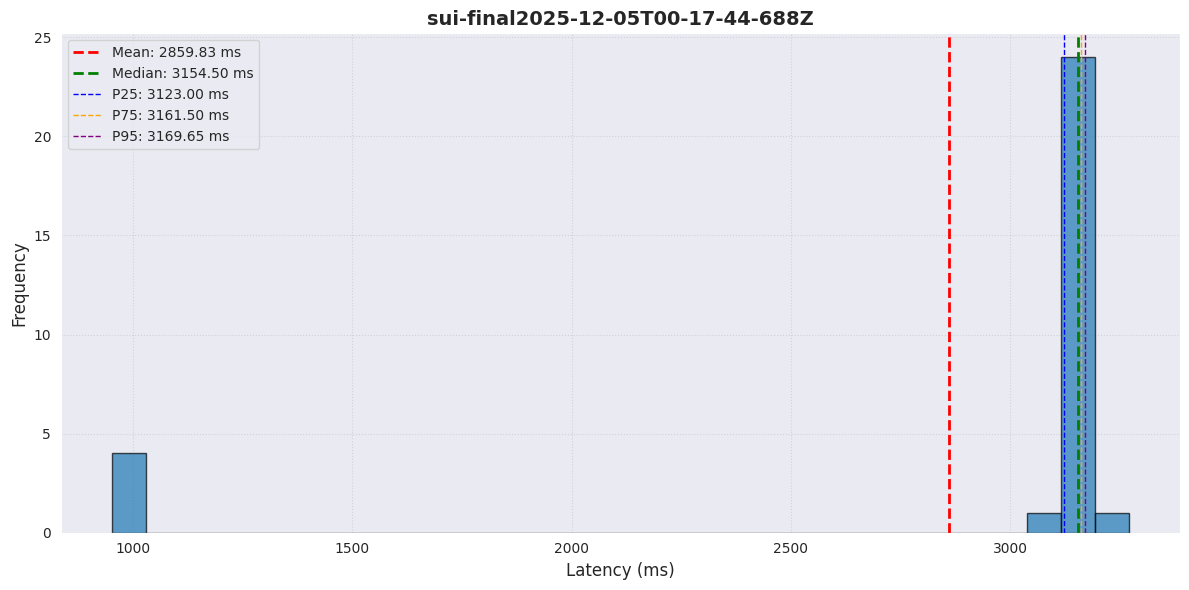

Graph saved: output/histogram_sui-final2025-12-05T00-17-44-688Z.png
statistics for sui-final2025-12-05T00-17-44-688Z:
  count: 30
  mean: 2859.8333333333335
  median: 3154.5
  std_dev: 759.5309842869835
  min: 952
  max: 3271
  p25: 3123.0
  p75: 3161.5
  p95: 3169.65
  p99: 3242.0


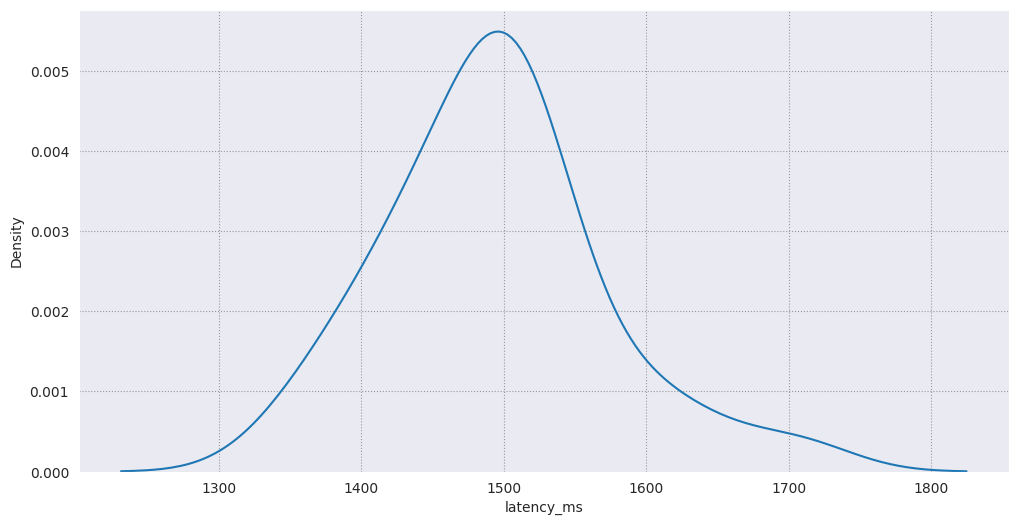

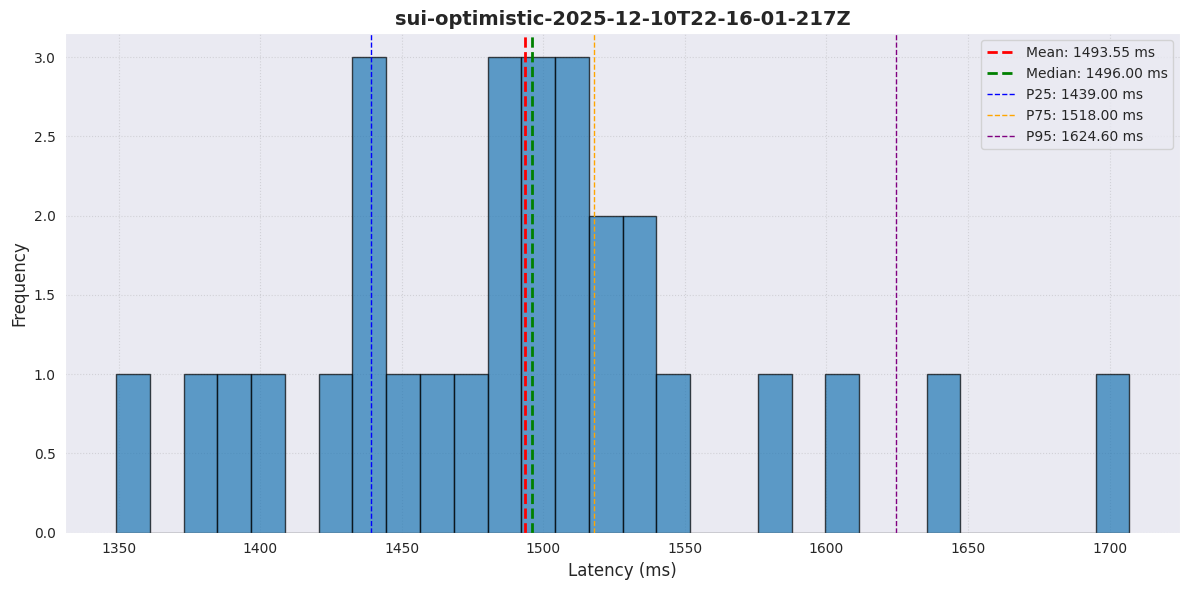

Graph saved: output/histogram_sui-optimistic-2025-12-10T22-16-01-217Z.png
statistics for sui-optimistic-2025-12-10T22-16-01-217Z:
  count: 29
  mean: 1493.551724137931
  median: 1496.0
  std_dev: 77.02206836211505
  min: 1349
  max: 1707
  p25: 1439.0
  p75: 1518.0
  p95: 1624.6
  p99: 1688.52


In [3]:
for name, df in datasets.items():
    
    mean = df['latency_ms'].mean()
    std = df['latency_ms'].std()
    df = df[(df['latency_ms'] >= mean - 3 * std) & (df['latency_ms'] <= mean + 3 * std)]

    stats = {
        'count': len(df),
        'mean': df["latency_ms"].mean(),
        'median': df["latency_ms"].median(),
        'std_dev': df["latency_ms"].std(),
        'min': df["latency_ms"].min(),
        'max': df["latency_ms"].max(),
        'p25': df["latency_ms"].quantile(0.25),
        'p75': df["latency_ms"].quantile(0.75),
        'p95': df["latency_ms"].quantile(0.95),
        'p99': df["latency_ms"].quantile(0.99),
    }
    

    sns.kdeplot(df['latency_ms'])    
    plt.show()
    fig, ax = plt.subplots()
    
    ax.hist(df['latency_ms'], bins=30, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Latency (ms)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'{name}', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    ax.axvline(stats['mean'], color='red', linestyle='--', linewidth=2, label=f'Mean: {stats['mean']:.2f} ms')
    ax.axvline(stats['median'], color='green', linestyle='--', linewidth=2, label=f'Median: {stats['median']:.2f} ms')
    ax.axvline(stats['p25'], color='blue', linestyle='--', linewidth=1, label=f'P25: {stats['p25']:.2f} ms')
    ax.axvline(stats['p75'], color='orange', linestyle='--', linewidth=1, label=f'P75: {stats['p75']:.2f} ms')
    ax.axvline(stats['p95'], color='purple', linestyle='--', linewidth=1, label=f'P95: {stats['p95']:.2f} ms')
    ax.legend()
    
    plt.tight_layout()
    output_file = output_path / f'histogram_{name}.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    print(f"Graph saved: {output_file}")
    
    print (f"statistics for {name}:")
    for key, value in stats.items():
        print(f"  {key}: {value}")
        
    print("=" * 80)